# Spam Collection using Naive Bayes
### we wil use SMSSpamCollection dataset for classification

## Importing Required Libraries 

In [1]:
import pandas as pd
from collections import Counter
import math
import matplotlib.pyplot as plt
import csv

## Loading DataSet 
### Separating the spam and ham messages in lists

In [2]:
messages = pd.read_csv('training.csv', sep='\t', quoting=csv.QUOTE_NONE, names=["label", "message"])
messages = messages.dropna() # drop empty row
spam = []
ham = []
for index, row in messages.iterrows():
    if row.label == 'spam':
        spam.append(row.message)
    if row.label == 'ham':
        ham.append(row.message)
len(messages)


5537

## Preprocessing

In [3]:
def cleanText(string):
    string = string.lower()
    string = string.replace(". ", " ")
    string = string.replace(": ", " ")
    string = string.replace("?"," ")
    string = string.replace("!"," ")
    string = string.replace(";", " ")
    string = string.replace(",", " ")
    return string

## Cleaning Data

In [4]:
ham = [cleanText(i) for i in ham]
spam = [cleanText(i) for i in spam]

## Counting the frquencies of token by spliting the massage with spaces for ham

In [5]:
wordCntForHam = Counter()
for row in ham:
    for word in row.split(' '):
        wordCntForHam[word] += 1
#wordCntForHam

## Counting the frquencies of token by spliting the massage with spaces for spam

In [6]:
wordCntForSpam = Counter()
for row in spam:
    for word in row.split(' '):
        wordCntForSpam[word] += 1
#wordCntForSpam

## Delete any token that are less than 3 characters in length and apply laplace smoothing 

In [7]:
hamClean = wordCntForHam.copy()
spamClean = wordCntForSpam.copy()

for i in wordCntForHam:
    if len(i) <= 2:
        del hamClean[i]
        
for i in wordCntForSpam:
    if len(i) <= 2:
        del spamClean[i]

for i in hamClean:
    hamClean[i] = wordCntForHam[i] + 1
    
for i in spamClean:
    spamClean[i] = wordCntForSpam[i] + 1

##  Find the Probabilities of the words given that they are an ham message or spam message

In [8]:
probHam = {}
probSpam = {}

for i in hamClean:
    probHam[i] = math.log(float(hamClean[i])/sum(hamClean.values()))

for i in spamClean:
    probSpam[i] = math.log(float(spamClean[i])/sum(spamClean.values()))

## Load test dataset

In [10]:
testMessages = pd.read_csv('test.csv', sep='\t', quoting=csv.QUOTE_NONE, names=["label", "message"], encoding = 'unicode_escape')
testMessages = testMessages.dropna()
testMessages
testMessages['message'] = [cleanText(i) for i in testMessages['message']]
#testMessages['message']

## Thats a process to find the message is ham or spam using probabilities of token that we calculate above 
### In this process: splitting the row by spaces and look up the word probablity of being an ham or spam message

In [11]:
results = []

for index, row in testMessages.iterrows():
    hamSum = 0
    spamSum = 0
    for word in row.message.split(' '):
        if len(word) <= 2:
            hamSum += 0
            spamSum += 0
        else:
            if word in probHam:
                hamSum += probHam[word]
            else:
                hamSum += math.log(float(1)/sum(hamClean.values()))
                
            if word in probSpam:
                spamSum += probSpam[word]
            else:
                spamSum += math.log(float(1)/sum(spamClean.values()))
    if hamSum > spamSum:
        results.append('ham')
    else:
        results.append('spam')

## results

In [12]:
testMessages['prediction'] = results
testMessages.head()

,label,message,prediction
0,ham,go until jurong point crazy. available only i...,ham
1,ham,ok lar.. joking wif u oni...,ham
2,spam,free entry in 2 a wkly comp to win fa cup fina...,spam
3,ham,u dun say so early hor.. u c already then say...,ham
4,ham,nah i don't think he goes to usf he lives aro...,ham


## import classification_report, accuracy_score, confusion_matrix

In [13]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
import sklearn

### Accuracy score and confusion matrix

In [14]:
print('accuracy', accuracy_score(testMessages['label'], testMessages['prediction']))
print('confusion matrix\n', confusion_matrix(testMessages['label'], testMessages['prediction']))
print('(row=expected, col=predicted)')

accuracy 0.9459459459459459
confusion matrix
 [[26  2]
 [ 0  9]]
(row=expected, col=predicted)


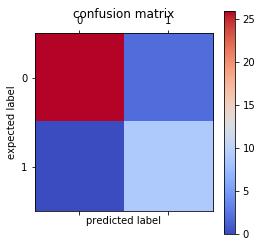

In [15]:
plt.matshow(confusion_matrix(testMessages['label'], testMessages['prediction']), cmap=plt.cm.coolwarm, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

## Classification report including f1_score, precision and recall

In [16]:
print(classification_report(testMessages['label'], testMessages['prediction']))

              precision    recall  f1-score   support

         ham       1.00      0.93      0.96        28
        spam       0.82      1.00      0.90         9

   micro avg       0.95      0.95      0.95        37
   macro avg       0.91      0.96      0.93        37
weighted avg       0.96      0.95      0.95        37



# Thankyou!